In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances, mutual_info_score, silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("titanic.csv")

In [66]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [67]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [68]:
df[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [51]:
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [52]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('Survived', axis=1))

In [64]:
df[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


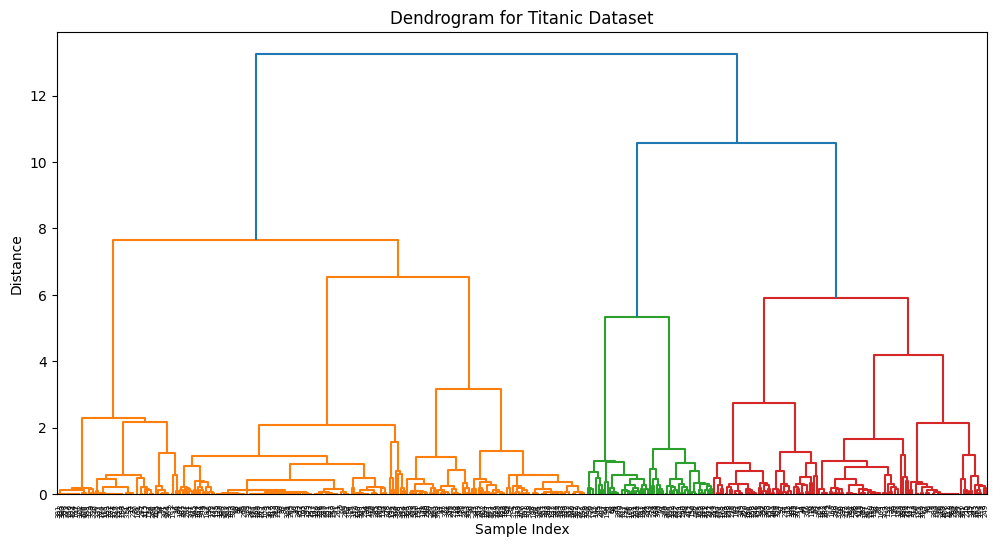

In [53]:
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Titanic Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [54]:
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']
linkage_functions = ['single', 'complete', 'average', 'ward']

In [55]:
results = []

for metric in distance_metrics:
    for linkage_func in linkage_functions:
        if metric == 'cosine' and linkage_func == 'ward':
            continue  
        if metric == 'cosine':
            distance_matrix = pairwise_distances(df_scaled, metric=metric)
        else:
            distance_matrix = pairwise_distances(df_scaled, metric=metric, n_jobs=-1)
        
        clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage_func)
        labels = clustering.fit_predict(distance_matrix)

        mi_score = mutual_info_score(df['Survived'], labels)
        sil_score = silhouette_score(df_scaled, labels)
        db_score = davies_bouldin_score(df_scaled, labels)
        
        results.append({
            'Metric': metric,
            'Linkage': linkage_func,
            'Mutual Information': mi_score,
            'Silhouette Score': sil_score,
            'Davies-Bouldin Index': db_score
        })


In [56]:
results_df = pd.DataFrame(results)
print("Clustering Results:")
print(results_df)

Clustering Results:
       Metric   Linkage  Mutual Information  Silhouette Score  \
0   euclidean    single            0.655482          0.399072   
1   euclidean  complete            0.469356          0.370166   
2   euclidean   average            0.629945          0.394985   
3   euclidean      ward            0.330023          0.330033   
4   manhattan    single            0.655482          0.399072   
5   manhattan  complete            0.000059          0.294669   
6   manhattan   average            0.036787          0.341964   
7   manhattan      ward            0.469356          0.370166   
8      cosine    single            0.072055          0.311296   
9      cosine  complete            0.006017          0.344058   
10     cosine   average            0.006017          0.344058   
11         l1    single            0.655482          0.399072   
12         l1  complete            0.000059          0.294669   
13         l1   average            0.036787          0.341964   
14   

In [57]:
df_scaled

array([[1.        , 1.        , 0.4527232 , ..., 0.        , 0.01528158,
        0.5       ],
       [1.        , 0.        , 0.61756561, ..., 0.        , 0.01366309,
        1.        ],
       [0.5       , 1.        , 0.8153765 , ..., 0.        , 0.01890874,
        0.5       ],
       ...,
       [1.        , 1.        , 0.50547277, ..., 0.        , 0.01415106,
        1.        ],
       [1.        , 1.        , 0.35381775, ..., 0.        , 0.01571255,
        1.        ],
       [1.        , 1.        , 0.35381775, ..., 0.11111111, 0.0436405 ,
        0.        ]])

In [58]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,27.0,0,0,8.0500,2


In [59]:
clustering_whole = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_whole = clustering_whole.fit_predict(df_scaled)

df_two_attributes = df_scaled[:, [3, 6]] 
clustering_two_attr = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_two_attr = clustering_two_attr.fit_predict(df_two_attributes)


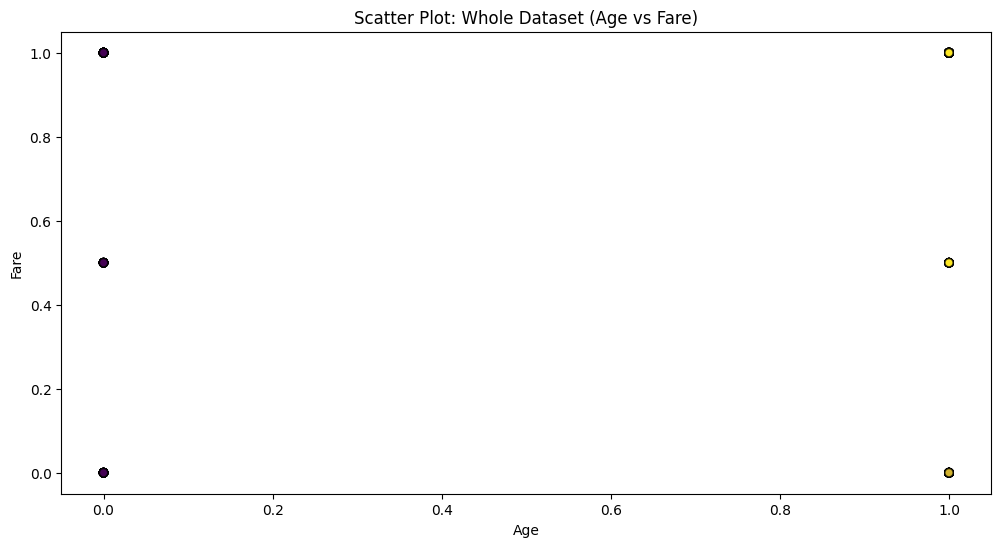

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled[:, 1], df_scaled[:, 6], c=labels_whole, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('Scatter Plot: Whole Dataset (Age vs Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


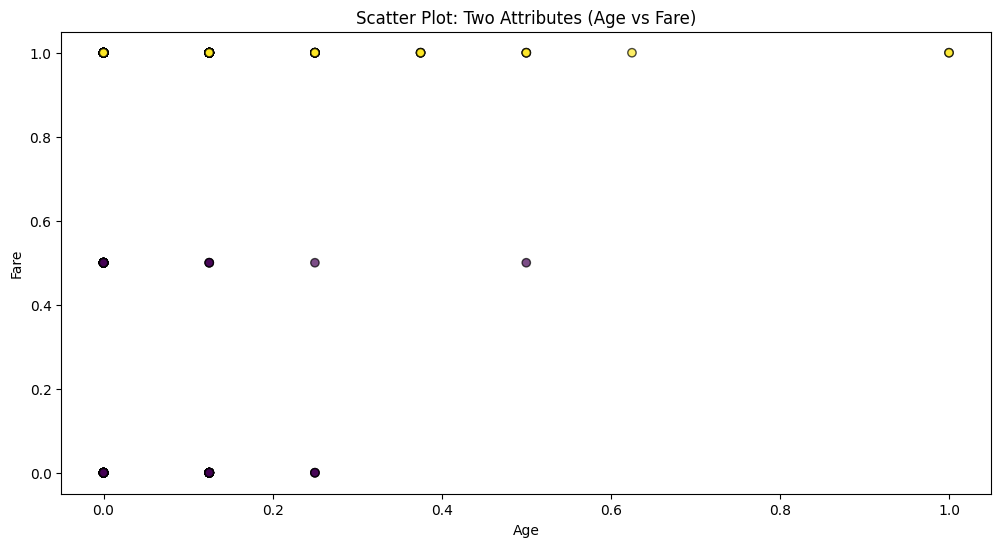

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(df_two_attributes[:, 0], df_two_attributes[:, 1], c=labels_two_attr, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('Scatter Plot: Two Attributes (Age vs Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [62]:
print("Evaluation Metrics for Whole Dataset:")
print(f"Mutual Information: {mutual_info_score(df['Survived'], labels_whole)}")
print(f"Silhouette Score: {silhouette_score(df_scaled, labels_whole)}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_scaled, labels_whole)}")

print("\nEvaluation Metrics for Two Attributes (Age vs Fare):")
print(f"Mutual Information: {mutual_info_score(df['Survived'], labels_two_attr)}")
print(f"Silhouette Score: {silhouette_score(df_two_attributes, labels_two_attr)}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_two_attributes, labels_two_attr)}")

Evaluation Metrics for Whole Dataset:
Mutual Information: 0.4693557746030724
Silhouette Score: 0.37016571856231684
Davies-Bouldin Index: 1.3729749756665859

Evaluation Metrics for Two Attributes (Age vs Fare):
Mutual Information: 0.005555074650833547
Silhouette Score: 0.8025449856916003
Davies-Bouldin Index: 0.36697964203083333
